<a href="https://colab.research.google.com/github/2003DEE/DEEPAK/blob/main/gradient%20descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)

In [4]:
def two_deg_jit(coeff,x,j):
  a=coeff[0]*(x*x)
  b=coeff[1]*(x)
  c=coeff[2]
  y=a+b+c
  interval=[y-j,y+j]
  min=interval[0]
  max=interval[1]
  jit=random.random()*max
  while min>jit:
    jit=random.random()*max
  return jit
hun_x=np.random.uniform(-10,10,100)
coeff=[1,1,1]
xl=[];yl=[]
for x in hun_x:
  y=two_deg_jit(coeff,x,0.5)
  xl.append(x)
  yl.append(y)


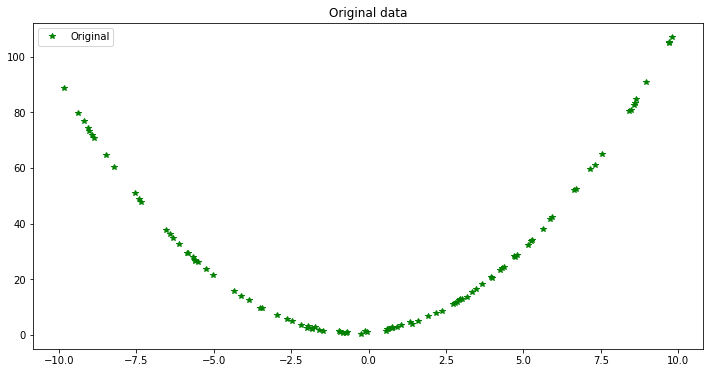

In [5]:
plt.figure(figsize=(12,6))
plt.plot(xl,yl,'g*',label="Original")
plt.title("Original data")
plt.legend()
plt.show()


In [6]:
def two_coef(coeff,x):
  a=coeff[0]*(x*x)
  b=coeff[1]*x
  c=coeff[2]
  y=a+b+c
  return y
xl=[];yl=[];coeff=[1,1,1]
for x in hun_x:
  y=two_coef(coeff,x)
  xl.append(x)
  yl.append(y)

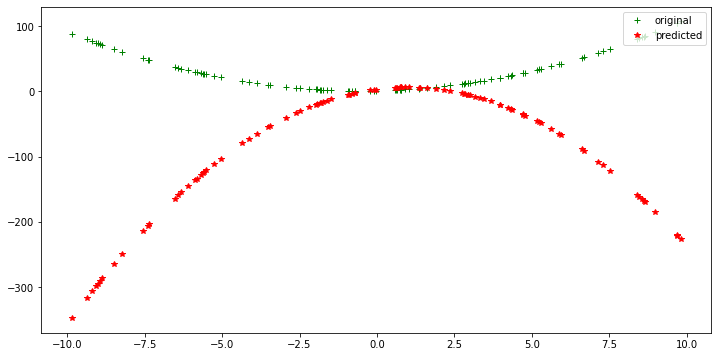

In [9]:
rand_coeff=(random.randrange(-10,10),random.randrange(-10,10),random.randrange(-10,10))
yl_bar=two_coef(rand_coeff,hun_x)
plt.figure(figsize=(12,6))
plt.plot(xl,yl,'g+',label='original')
plt.plot(xl,yl_bar,'r*',label='predicted')
plt.legend(loc='upper right')
plt.show()

In [10]:
def loss(yl,yl_bar):
  return sum((yl-yl_bar)**2)/len(yl)
ini_mse=loss(yl,yl_bar)
ini_mse

27131.0070890915